In [216]:
def show_cross_validate(modelo, X, Y, k):
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    cv_results = cross_validate(modelo, X, Y, cv=k, scoring=scoring)

    #Print Metrics Mean
    print('Accuracy: ', cv_results['test_accuracy'].mean(),
         '\nPrecision: ', cv_results['test_precision'].mean(),
         '\nRecall: ', cv_results['test_recall'].mean(),
         '\nF1: ', cv_results['test_f1'].mean())
    
def show_roc_curve(y_true, y_prob):
    fpr, tpr, threshold = roc_curve(y_true, y_prob)

    plt.figure(figsize=(10, 7))
    plt.title('ROC CURVE AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot(fpr, tpr, lw=2)
    plt.plot([0, 1], [0, 1], lw=2,linestyle='--')
    plt.show()

In [217]:
#!pip install plotly
#!conda install -c conda-forge jupyter_contrib_nbextensions
#!pip install https://s3-us-west-2.amazonaws.com/xgboost-nightly-builds/xgboost-[version]+[commithash]-py2.py3-none-manylinux1_x86_64.whl

In [218]:
import pandas as pd
import statistics as sta
import plotly.graph_objs as go
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier
import numpy as np

In [219]:
train_csv_path = "df_titanic/train.csv"
df_train = pd.read_csv(train_csv_path)

In [220]:
pd.options.display.max_rows = None

In [221]:
df_train[df_train['Age'] == 21]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,NaN,S
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5000,NaN,S
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
115,116,0,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,STON/O 2. 3101294,7.9250,NaN,S
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S
173,174,0,3,"Sivola, Mr. Antti Wilhelm",male,21.0,0,0,STON/O 2. 3101280,7.9250,NaN,S
391,392,1,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,7.7958,NaN,S


In [222]:
#Entendimento dos dados

# Tratamento de dados

In [223]:
df_train.groupby(['Sex', 'Pclass', 'Survived'],as_index = False).count()

,Sex,Pclass,Survived,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,female,1,0,3,3,3,3,3,3,3,3,3
1,female,1,1,91,91,82,91,91,91,91,78,89
2,female,2,0,6,6,6,6,6,6,6,1,6
3,female,2,1,70,70,68,70,70,70,70,9,70
4,female,3,0,72,72,55,72,72,72,72,2,72
5,female,3,1,72,72,47,72,72,72,72,4,72
6,male,1,0,77,77,61,77,77,77,77,56,77
7,male,1,1,45,45,40,45,45,45,45,39,45
8,male,2,0,91,91,84,91,91,91,91,2,91
9,male,2,1,17,17,15,17,17,17,17,4,17


In [224]:
df_vazio = df_train[df_train['Age'].isnull()]

In [225]:
df_vazio = df_vazio.groupby(['PassengerId', 'Sex'], as_index=False).count()

In [226]:
df_vazio = df_vazio.groupby(['Sex'])['Age'].count().reset_index(name='Quantidade de idade vazia')

Text(0.5, 1.0, 'Quantidade de NAs nos registros')

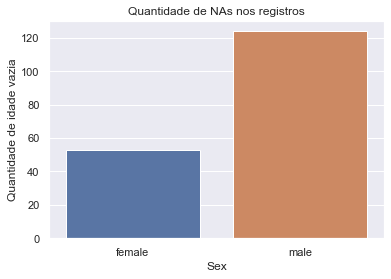

In [227]:
sns.barplot(x='Sex', y='Quantidade de idade vazia', data=df_vazio).set_title('Quantidade de NAs nos registros')

# Tratando os Nulos

In [228]:
#Fill NaN values with the Miss' median age
df_train['Age'] = df_train.apply(lambda x : 21 if (('Miss.' in x['Name']) & (pd.isnull(x['Age']) == True)) else x['Age'], axis = 1)

In [229]:
#Fill NaN values with the Master's median age
df_train['Age'] = df_train.apply(lambda x : 3.5 if (('Master' in x['Name']) & (pd.isnull(x['Age']) == True)) else x['Age'], axis=1)

In [230]:
#Fill NaN values with the Mr's median age
df_train.Age = df_train.apply(lambda x: 30 if (('Mr.' in x['Name']) & (pd.isnull(x['Age']) == True ))else x['Age'], axis=1)

In [231]:
#Fill NaN values with the Mrs' median age
df_train.Age = df_train.apply(lambda x: 35 if (('Mrs.' in x['Name']) & (pd.isnull(x['Age']) == True)) else x['Age'], axis=1)

In [232]:
#Fill NaN values with the Dr's Median Age
df_train.Age = df_train.apply(lambda x: 46.5 if (('Dr.' in x['Name']) & (pd.isnull(x['Age']) == True)) else x['Age'], axis=1)

In [233]:
#df_train[(df_train['Name'].str.contains('Dr.', regex=False) & (df_train['Age'].isnull() == False))].Age.median()

In [234]:
#df_train[df_train.Age.isnull()].Age.count()

In [235]:
#df_train.loc[(df_train['Name'].str.contains('Miss', regex=False))]

In [236]:
#df_train[(df_train['Age'].isnull() == False) & (df_train['Name'].str.contains('Miss', regex=False))].median()

In [237]:
#df_train[(df_train['Age'].isnull() == False) & (df_train['Name'].str.contains('Miss', regex=False)  & (df_train['Age'] == 21))]

In [238]:
#df_train

In [239]:
df_full = df_train[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age']].copy()

In [240]:
df_full['Sex_d'] = df_full.Sex.map({'female':0, 'male':1})

In [241]:
df_full = df_full.drop(columns={'Sex'}).rename(columns={'Sex_d':'Sex_Male'})


In [242]:
df_full[df_full['Age'].isnull()]

,PassengerId,Survived,Pclass,Age,Sex_Male


# Data Understanding

In [243]:
df_age = df_train.groupby(['Sex', 'Pclass', 'Survived'], as_index = True)['PassengerId'].count()

In [244]:
df_age = df_age.rename(columns={'PassengerId': 'Count'}, inplace=True)

In [245]:
 df_age = df_age.reset_index(name='Count')

In [246]:
df_female = df_age[df_age['Sex'] == 'female']

In [247]:
df_female

,Sex,Pclass,Survived,Count
0,female,1,0,3
1,female,1,1,91
2,female,2,0,6
3,female,2,1,70
4,female,3,0,72
5,female,3,1,72


In [248]:
df_male = df_age.reset_index()

Text(0.5, 1.0, 'Sobrevivência de Mulheres')

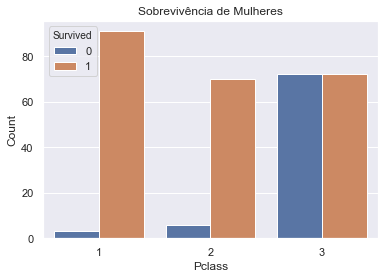

In [249]:
sns.barplot(x = "Pclass", y = "Count", data = df_female, hue = "Survived").set_title('Sobrevivência de Mulheres')

Text(0.5, 1.0, 'Sobrevivência de Homens')

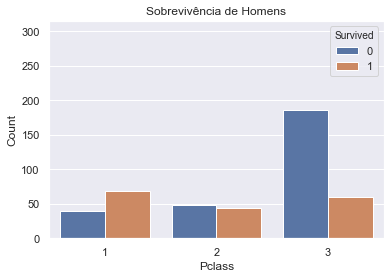

In [250]:
sns.barplot(x = 'Pclass', y = 'Count', data = df_male, hue= 'Survived', errwidth=0).set_title('Sobrevivência de Homens')

# Faixa Etaria

In [251]:
binn = []
for x in range(0, 90, 10):
    binn.append(x)
binn

[0, 10, 20, 30, 40, 50, 60, 70, 80]

In [252]:
df_age = df_train.groupby(['Sex', 'Pclass', 'Survived', pd.cut(df_train['Age'], binn)], as_index = True)['Age'].count()

In [253]:
#Para resetar o indice e nomear a coluna count
df_age = df_age.reset_index(name='count')

In [254]:
df_age_f = df_age[df_age['Sex'] == 'female']

In [255]:
df_age_f.head()

,Sex,Pclass,Survived,Age,count
0,female,1,0,"(0, 10]",1
1,female,1,0,"(20, 30]",1
2,female,1,0,"(40, 50]",1
3,female,1,1,"(10, 20]",13
4,female,1,1,"(20, 30]",21


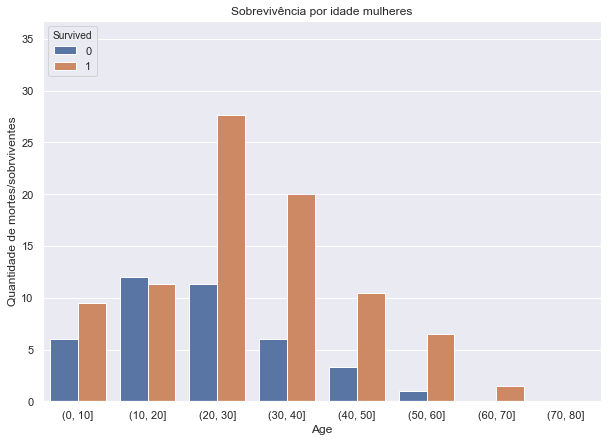

In [256]:
f, ax = plt.subplots(figsize=(10,7))
sns.barplot(x='Age', y='count', data=df_age_f, hue='Survived', errwidth=0).set_title('Sobrevivência por idade mulheres')
plt.ylabel('Quantidade de mortes/sobrviventes')
plt.show()

In [257]:
df_age_m = df_age[df_age['Sex'] == 'male']

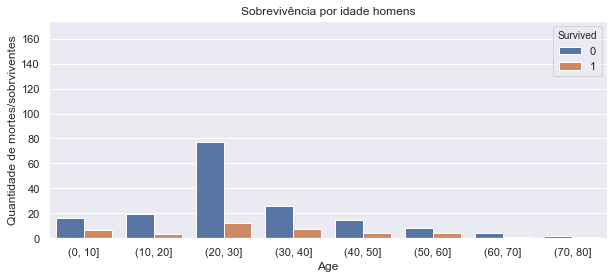

In [258]:
f, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x='Age', y='count', data=df_age_m, hue='Survived', errwidth=0).set_title('Sobrevivência por idade homens')
plt.ylabel('Quantidade de mortes/sobrviventes')

plt.show()

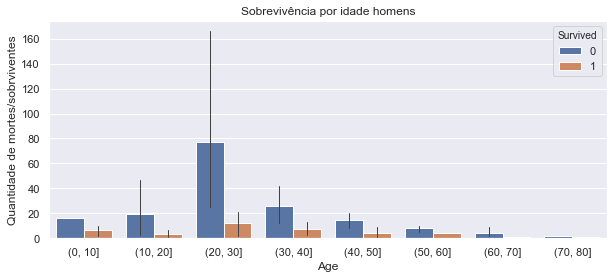

In [259]:
f, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x='Age', y='count', data=df_age_m, hue='Survived', errwidth=1).set_title('Sobrevivência por idade homens')
plt.ylabel('Quantidade de mortes/sobrviventes')

plt.show()

In [260]:
#Ver probabilidade das crianças sobreviverem,
#se somente recem nascido tem mais chance de sobreviver, 
#caso entrar idades nulas olhar Pclass para ver se encontra alguma coorelação
#df_name.head()

# Análise Diagnóstica

In [261]:
df_child = df_full.copy()
df_child['LessThanFive'] = df_full.apply(lambda x : 1 if (x['Age'] < 5) else 0, axis = 1)

In [262]:
df_child[df_child['Age'] < 5].head()

,PassengerId,Survived,Pclass,Age,Sex_Male,LessThanFive
7,8,0,3,2.0,1,1
10,11,1,3,4.0,0,1
16,17,0,3,2.0,1,1
43,44,1,2,3.0,0,1
63,64,0,3,4.0,1,1


In [263]:
dict_tmp = {}
#Classe e Survived
df_tmp = df_child.copy()
df_tmp.drop(df_tmp[df_tmp.Age>12].index,inplace=True)
print('menores de 5:',
    '\nClasse 1 mortos:',str(df_tmp[(df_tmp.Survived==0) & (df_tmp.Pclass==1) & (df_tmp.LessThanFive==1)].shape[0]),
    '\nClasse 2 mortos:',str(df_tmp[(df_tmp.Survived==0) & (df_tmp.Pclass==2) & (df_tmp.LessThanFive==1)].shape[0]),
    '\nClasse 3 mortos:',str(df_tmp[(df_tmp.Survived==0) & (df_tmp.Pclass==3) & (df_tmp.LessThanFive==1)].shape[0]))
print('\n')
print('maiores de 5:',
    '\nClasse 1 mortos:',str(df_tmp[(df_tmp.Survived==0) & (df_tmp.Pclass==1) & (df_tmp.LessThanFive==0)].shape[0]),
    '\nClasse 2 mortos:',str(df_tmp[(df_tmp.Survived==0) & (df_tmp.Pclass==2) & (df_tmp.LessThanFive==0)].shape[0]),
    '\nClasse 3 mortos:',str(df_tmp[(df_tmp.Survived==0) & (df_tmp.Pclass==3) & (df_tmp.LessThanFive==0)].shape[0]))

menores de 5: 
Classe 1 mortos: 1 
Classe 2 mortos: 0 
Classe 3 mortos: 14


maiores de 5: 
Classe 1 mortos: 0 
Classe 2 mortos: 0 
Classe 3 mortos: 16


In [264]:
df_tmp.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'Sex_Male', 'LessThanFive'], dtype='object')

In [265]:
#Mulheres sobreviventes e não sobreviventes
mask = (df_tmp.Sex_Male==0) & (df_tmp.LessThanFive==0)
print(
    'Meninas mais velhas mortas:',str(df_tmp[(df_tmp.Survived==0) & mask].shape[0]),
    '\nMeninas mais velhas sobreviventes:',str(df_tmp[(df_tmp.Survived==1) & mask].shape[0]))
#Mulheres sobreviventes e não sobreviventes
mask = (df_tmp.Sex_Male==0) & (df_tmp.LessThanFive==1)
print(
    'Meninas mais novas mortas:',str(df_tmp[(df_tmp.Survived==0) & mask].shape[0]),
    '\nMeninas mais novas sobreviventes:',str(df_tmp[(df_tmp.Survived==1) & mask].shape[0]))

Meninas mais velhas mortas: 8 
Meninas mais velhas sobreviventes: 7
Meninas mais novas mortas: 5 
Meninas mais novas sobreviventes: 12


In [266]:
dict_tmp = {'Age': ['0-5', '6-12']}


In [267]:
#Mulheres sobreviventes e não sobreviventes
#mulheres sobreviventes

mask = (df_tmp.Survived == 1) & (df_tmp.Sex_Male == 0)
dict_tmp.update({'Meninas Sobreviventes': [df_tmp[(mask) & (df_tmp.LessThanFive == 1)].shape[0], 
                                       df_tmp[(mask) & (df_tmp.LessThanFive == 0)].shape[0]]})
#mulheres nao sobreviventes
mask = (df_tmp.Survived == 0) & (df_tmp.Sex_Male == 0)
dict_tmp.update({'Meninas nao Sobreviventes': [df_tmp[(mask) & (df_tmp.LessThanFive == 1)].shape[0],
                                           df_tmp[(mask) & (df_tmp.LessThanFive == 0)].shape[0]]})


In [268]:
#Homens sobreviventes e não sobreviventes
mask = (df_tmp.Sex_Male==1) & (df_tmp.LessThanFive==0)
print(
    'Meninos mais velhos mortos:',str(df_tmp[(df_tmp.Survived==0) & mask].shape[0]),
    '\nMeninos mais velhos sobreviventes:',str(df_tmp[(df_tmp.Survived==1) & mask].shape[0]))
mask = (df_tmp.Sex_Male==1) & (df_tmp.LessThanFive==1)
print(
    'Meninos mais novos mortos:',str(df_tmp[(df_tmp.Survived==0) & mask].shape[0]),
    '\nMeninos mais novos sobreviventes:',str(df_tmp[(df_tmp.Survived==1) & mask].shape[0]))

Meninos mais velhos mortos: 8 
Meninos mais velhos sobreviventes: 6
Meninos mais novos mortos: 10 
Meninos mais novos sobreviventes: 17


In [269]:
#Meninos sobreviventes e não sobreviventes
#Meninos sobreviventes
mask = (df_tmp.Survived == 1) & (df_tmp.Sex_Male == 1)
dict_tmp.update({'Meninos Sobreviventes': [df_tmp[(mask) & (df_tmp.LessThanFive == 1)].shape[0], 
                                       df_tmp[(mask) & (df_tmp.LessThanFive == 0)].shape[0]]})
#mulheres nao sobreviventes
mask = (df_tmp.Survived == 0) & (df_tmp.Sex_Male == 1)
dict_tmp.update({'Meninos nao Sobreviventes': [df_tmp[(mask) & (df_tmp.LessThanFive == 1)].shape[0],
                                           df_tmp[(mask) & (df_tmp.LessThanFive == 0)].shape[0]]})


In [270]:
#sobreviventes e não sobreviventes
dict_tmp.update({'Total de sobreviventes':[df_tmp[(df_tmp.Survived == 1) & (df_tmp.LessThanFive == 1)].shape[0],
                                      df_tmp[(df_tmp.Survived == 1) & (df_tmp.LessThanFive == 0)].shape[0]]})

dict_tmp.update({'Total de não sobreviventes':[df_tmp[(df_tmp.Survived == 0) & (df_tmp.LessThanFive == 1)].shape[0],
                                      df_tmp[(df_tmp.Survived == 0) & (df_tmp.LessThanFive == 0)].shape[0]]})


In [271]:
#Porcentagem dos sobreviventes Menores que 5 anos
dict_tmp.update({'% sobreviventes':[(df_tmp[(df_tmp.LessThanFive == 1) & (df_tmp.Survived == 1)].shape[0] / df_tmp[df_tmp.Survived == 1].shape[0]) * 100,
                                                 (df_tmp[(df_tmp.LessThanFive == 0) & (df_tmp.Survived == 1)].shape[0] / df_tmp[df_tmp.Survived == 1].shape[0]) * 100]})




In [272]:
#Homens Sobreviventes
mask = (df_tmp.Sex_Male==1) & (df_tmp.LessThanFive==0)
print(
    'Meninos não sobreviventes:',str(df_tmp[(df_tmp.Survived==0) & mask].shape[0]),
    '\nMeninas mais velhas sobreviventes:',str(df_tmp[(df_tmp.Survived==1) & mask].shape[0]))

Meninos não sobreviventes: 8 
Meninas mais velhas sobreviventes: 6


In [273]:
#Homens não sobreviventes
mask2 = (df_full.Survived==0) & (df_full.Sex_Male == 1)
df_full[mask2].shape[0]

468

In [274]:
#Porcentagem dos Sobrviventes Menores que 5 anos pertencentes à classe 1
dict_tmp.update({'% Sobreviventes classe 1: ':[(df_tmp[(df_tmp.LessThanFive==1) & (df_tmp.Survived==1) & (df_tmp.Pclass == 1)].shape[0] / df_tmp[df_tmp.Survived == 1].shape[0]) * 100,
                                                                           (df_tmp[(df_tmp.LessThanFive==0) & (df_tmp.Survived==1) & (df_tmp.Pclass == 1)].shape[0] / df_tmp[df_tmp.Survived == 1].shape[0]) * 100]})



In [275]:
dict_tmp.update({'% Sobreviventes Classe 2:':[(df_tmp[(df_tmp.LessThanFive==1) & (df_tmp.Survived==1) & (df_tmp.Pclass == 2)].shape[0] / df_tmp[df_tmp.Survived == 1].shape[0])*100,
                                                                           (df_tmp[(df_tmp.LessThanFive==0) & (df_tmp.Survived==1) & (df_tmp.Pclass == 2)].shape[0] / df_tmp[df_tmp.Survived == 1].shape[0])*100]})


In [276]:
dict_tmp.update({'% Sobreviventes Classe 3:':[(df_tmp[(df_tmp.LessThanFive==1) & (df_tmp.Survived==1) & (df_tmp.Pclass == 3)].shape[0] / df_tmp[df_tmp.Survived == 1].shape[0])*100,
                                                                           (df_tmp[(df_tmp.LessThanFive==0) & (df_tmp.Survived==1) & (df_tmp.Pclass == 3)].shape[0] / df_tmp[df_tmp.Survived == 1].shape[0])*100]})


In [277]:
df_child = pd.DataFrame(dict_tmp)

In [278]:
df_child = df_child.set_index('Age')

In [279]:
df_teste = df_child.reset_index()

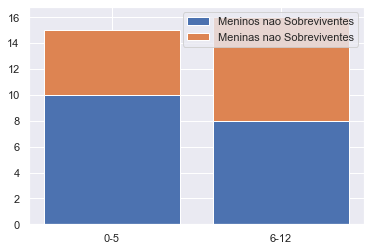

In [280]:
pl3 = plt.bar(df_teste['Age'], df_teste['Meninos nao Sobreviventes'])
pl4 = plt.bar(df_teste['Age'], df_teste['Meninas nao Sobreviventes'], bottom = df_teste['Meninos nao Sobreviventes'])
plt.legend((pl3[0], pl4[0]), ('Meninos nao Sobreviventes', 'Meninas nao Sobreviventes'))
plt.show()

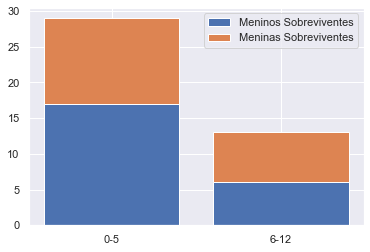

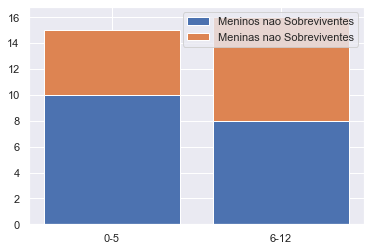

In [281]:
pl1 = plt.bar(df_teste['Age'], df_teste['Meninos Sobreviventes'])
pl2 = plt.bar(df_teste['Age'], df_teste['Meninas Sobreviventes'], bottom = df_teste['Meninos Sobreviventes'])
plt.legend((pl1[0], pl2[0]), ('Meninos Sobreviventes', 'Meninas Sobreviventes'))
plt.show()
pl3 = plt.bar(df_teste['Age'], df_teste['Meninos nao Sobreviventes'])
pl4 = plt.bar(df_teste['Age'], df_teste['Meninas nao Sobreviventes'], bottom = df_teste['Meninos nao Sobreviventes'])
plt.legend((pl3[0], pl4[0]), ('Meninos nao Sobreviventes', 'Meninas nao Sobreviventes'))
plt.show()

In [282]:
df_child.head()

,Meninas Sobreviventes,Meninas nao Sobreviventes,Meninos Sobreviventes,Meninos nao Sobreviventes,Total de sobreviventes,Total de não sobreviventes,% sobreviventes,% Sobreviventes classe 1:,% Sobreviventes Classe 2:,% Sobreviventes Classe 3:
Age,,,,,,,,,,
0-5,12,5,17,10,29,15,69.047619,4.761905,28.571429,35.714286
6-12,7,8,6,8,13,16,30.952381,2.380952,11.904762,16.666667


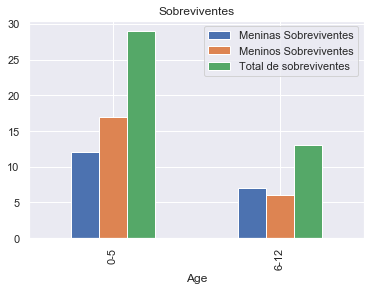

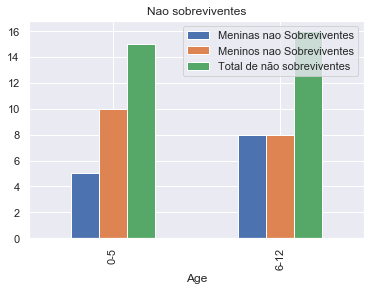

In [283]:
df_child[['Meninas Sobreviventes', 'Meninos Sobreviventes', 'Total de sobreviventes']].plot(kind='bar', title='Sobreviventes')
df_child[['Meninas nao Sobreviventes', 'Meninos nao Sobreviventes', 'Total de não sobreviventes']].plot(kind='bar', title='Nao sobreviventes')

In [284]:
df_full

,PassengerId,Survived,Pclass,Age,Sex_Male
0,1,0,3,22.00,1
1,2,1,1,38.00,0
2,3,1,3,26.00,0
3,4,1,1,35.00,0
4,5,0,3,35.00,1
5,6,0,3,30.00,1
6,7,0,1,54.00,1
7,8,0,3,2.00,1
8,9,1,3,27.00,0
9,10,1,2,14.00,0


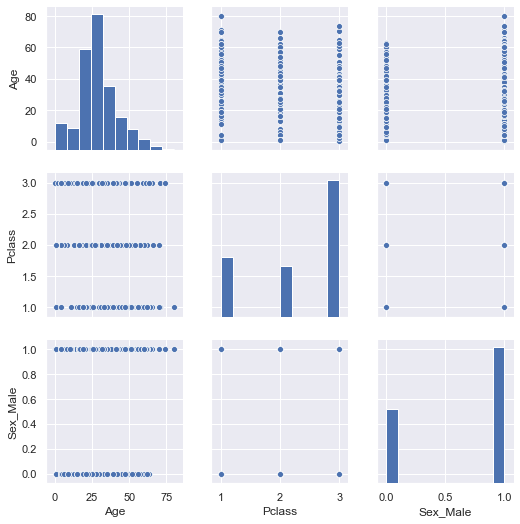

In [285]:
sns.set(context='notebook', style='darkgrid')
sns.pairplot(df_full[['Age', 'Pclass', 'Sex_Male']], height=2.5)
plt.show()

# Correlation Grapich

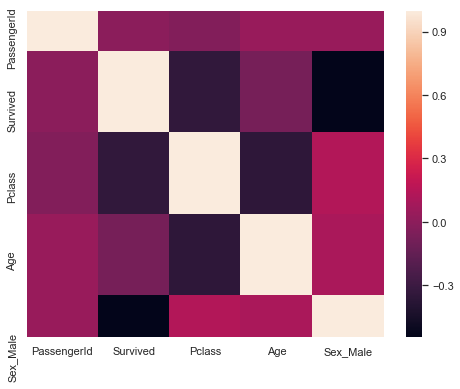

In [286]:
correlation = df_full.corr()
correlation['Age'].sort_values(ascending = False).head(15)

f, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(correlation)
plt.show()

# Machine Learning

In [287]:
from sklearn.model_selection import train_test_split

# Regressão Linear Logistica

In [288]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [289]:
df_full.head()

,PassengerId,Survived,Pclass,Age,Sex_Male
0,1,0,3,22.0,1
1,2,1,1,38.0,0
2,3,1,3,26.0,0
3,4,1,1,35.0,0
4,5,0,3,35.0,1


In [290]:
X_train, X_test, y_train, y_test = train_test_split(df_full[['Pclass', 'Sex_Male', 'Age']], df_full.Survived, train_size = 0.7, random_state=1)

In [291]:
from sklearn.linear_model import LogisticRegression

In [292]:
model = LogisticRegression()

In [293]:
model.fit(X_train, y_train)

C:\Users\BrunoDefantedaSilva\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [294]:
yhat = model.predict(X_test)

In [295]:
y_hat_prob = model.predict_proba(X_test)[:, 1]

(array([85., 30., 22., 17., 18., 12., 23., 15., 19., 27.]),
 array([0.04755369, 0.1350872 , 0.22262071, 0.31015422, 0.39768774,
        0.48522125, 0.57275476, 0.66028827, 0.74782178, 0.83535529,
        0.9228888 ]),
 <a list of 10 Patch objects>)

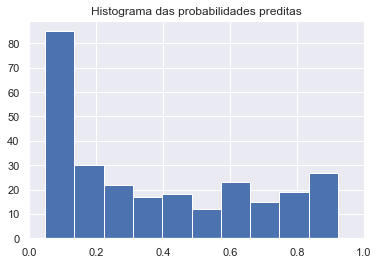

In [296]:
plt.title('Histograma das probabilidades preditas')
plt.xlim(0, 1)
plt.hist(y_hat_prob, bins=10)

# Metrics

In [297]:
yhat

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0], dtype=int64)

In [298]:
#y_test['Pred'] = yhat

In [299]:
#y_test.pop('Pred')

In [300]:
#y_test = pd.DataFrame(y_test)

In [301]:
#y_test['Pred'] = yhat

In [302]:
#y_test

In [303]:
#Accuracy Metric. It's the proportion of true values among of the total numbers of the classes examined.
ac_logistic = accuracy_score(y_test, yhat)
ac_logistic

0.7686567164179104

In [304]:
#Precision Metric. It's the proportion of true values that are really true
precision_score(y_test, yhat)

0.7789473684210526

In [305]:
#Recall_score. It's how many true positives were recalled (found) and how many of the correct hits were also found 
recall_score(y_test, yhat)

0.6434782608695652

In [306]:
#F1_Score Metric. It's a number between 0 and 1. It's a hamonic mean of Precision and Recall Metrics
f1_score(y_test, yhat)

0.7047619047619047

In [307]:
#Criando a comparacao

In [308]:
yhat2 = pd.DataFrame(yhat).rename(columns = {0:'Predito'})

In [309]:
yhat2 = yhat2.set_index(y_test.index)

In [310]:
y_test2 = pd.DataFrame(y_test)

In [311]:
y_test2['Predito'] = yhat2['Predito']

In [312]:
#pd.options.display.max_rows = None

In [313]:
y_test2

,Survived,Predito
862,1,1
223,0,0
84,1,1
680,0,1
535,1,1
623,0,0
148,0,0
3,1,1
34,0,0
241,1,1


# Confusion Matrix - Logistic Regression

[]

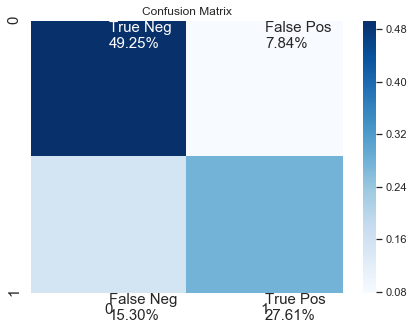

In [314]:
fig = plt.figure(figsize=(7,5))
cm = confusion_matrix(y_test, yhat)
kws = {"ha": 'left',"va": 'top', "size":15}
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
heatmap = sns.heatmap(cm/np.sum(cm), annot=labels, annot_kws=kws, fmt='', cmap='Blues').set_title('Confusion Matrix')
plt.tick_params(labelsize=15)
plt.plot()

# ROC CURVE AUC - Logistic Regression

In [315]:
fpr, tpr, threshold = roc_curve(y_test, y_hat_prob)

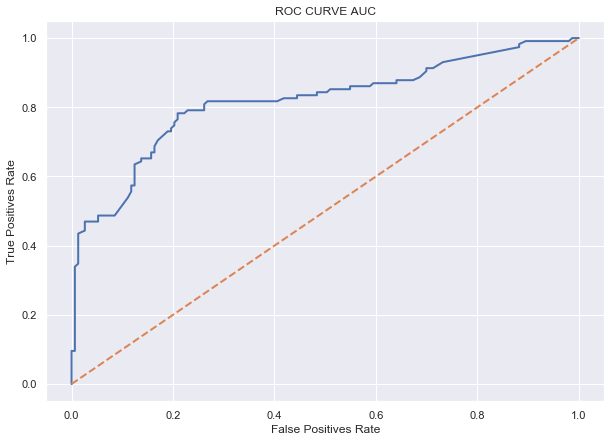

In [316]:
plt.figure(figsize=(10, 7))
plt.title('ROC CURVE AUC')
plt.xlabel('False Positives Rate')
plt.ylabel('True Positives Rate')
plt.plot(fpr, tpr, lw=2)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.show()

# Árvore de decisão

In [317]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [318]:
df_full[['Pclass', 'Age', 'Sex_Male']].head()

,Pclass,Age,Sex_Male
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1


In [319]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_full[['Pclass', 'Age', 'Sex_Male']], df_full.Survived, train_size=0.75, random_state=1)

In [320]:
model_tree = DecisionTreeClassifier()

In [321]:
model_tree.fit(X_train2, y_train2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [322]:
df_full

,PassengerId,Survived,Pclass,Age,Sex_Male
0,1,0,3,22.00,1
1,2,1,1,38.00,0
2,3,1,3,26.00,0
3,4,1,1,35.00,0
4,5,0,3,35.00,1
5,6,0,3,30.00,1
6,7,0,1,54.00,1
7,8,0,3,2.00,1
8,9,1,3,27.00,0
9,10,1,2,14.00,0


In [323]:
yhat = model_tree.predict(X_test2)

In [324]:
y_hat_prob = model_tree.predict_proba(X_test2)[:, 1]

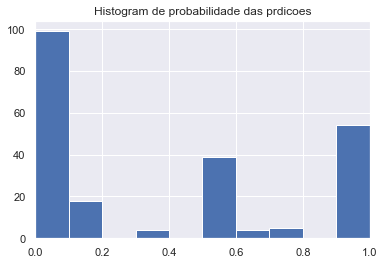

In [325]:
plt.hist(y_hat_prob, bins=10)
plt.xlim(0, 1)
plt.title('Histogram de probabilidade das prdicoes')
plt.show()

# Metrics

In [326]:
#Accuracy Metric. It's the proportion of true values among of the total numbers of the classes examined.
ac_tree = accuracy_score(y_test2, yhat)
ac_tree

0.7713004484304933

In [327]:
#Precision Metric. It's the proportion of true values that are really true
precision_score(y_test2, yhat)

0.8333333333333334

In [328]:
#Recall_score. It's how many true positives were recalled (found) and how many of the correct hits were also found 
recall_score(y_test2, yhat)

0.5789473684210527

In [329]:
#F1_Score Metric. It's a number between 0 and 1. It's a hamonic mean of Precision and Recall Metrics
f1_score(y_test2, yhat)

0.6832298136645962

# Confusion Matrix - Tree Decision

[]

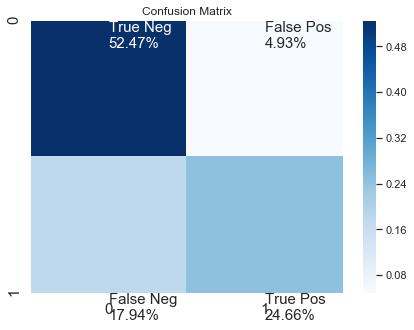

In [330]:
fig = plt.figure(figsize=(7,5))
cm = confusion_matrix(y_test2, yhat)
kws = {"ha": 'left',"va": 'top', "size":15}
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
heatmap = sns.heatmap(cm/np.sum(cm), annot=labels, annot_kws=kws, fmt='', cmap='Blues').set_title('Confusion Matrix')
plt.tick_params(labelsize=15)
plt.plot()

# ROC Curve AUC - Decision Tree

In [331]:
fpr, tpr, threshold = roc_curve(y_test2, y_hat_prob)

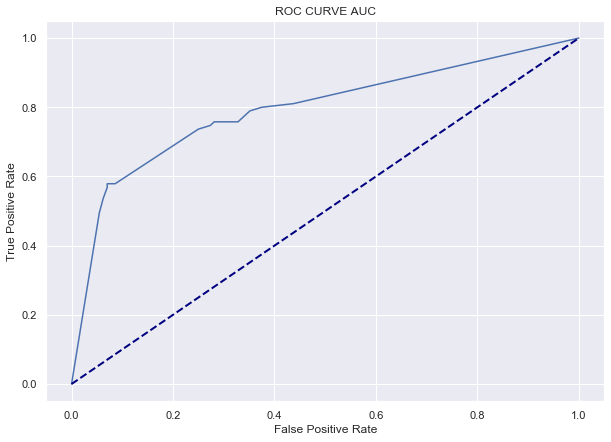

In [332]:
plt.figure(figsize=(10, 7))
plt.title('ROC CURVE AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

In [333]:
#pd.options.display.max_rows = 60

In [334]:
#df_full.head()

In [335]:
yhat = pd.DataFrame(yhat).rename(columns = {0:'Predito'})

In [336]:
yhat = yhat.set_index(y_test2.index)

In [337]:
y_test2 = pd.DataFrame(y_test2)
y_test2['Predito'] = yhat['Predito']

In [338]:
#That's a comparation between the True values and the Predicted values
y_test2

,Survived,Predito
862,1,1
223,0,0
84,1,1
680,0,0
535,1,1
623,0,0
148,0,0
3,1,1
34,0,0
241,1,0


# Random Forest Classification

In [339]:
X_train, X_test, y_train, y_test = train_test_split(df_full[['Pclass', 'Age', 'Sex_Male']], df_full.Survived, train_size=0.7, random_state=1)

In [340]:
model_rfc = RandomForestClassifier()
model = RandomForestClassifier()

In [341]:
#model.fit(X_train, y_train)
model_rfc.fit(df_full[['Pclass', 'Age', 'Sex_Male']], df_full.Survived)
model.fit(X_train, y_train)

C:\Users\BrunoDefantedaSilva\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\BrunoDefantedaSilva\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [342]:
#yhat = model_rfc.predict(df_full[['Pclass', 'Age', 'Sex_Male']])
yhat = model.predict(X_test)
yhat

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0], dtype=int64)

In [343]:
y_hat_prob = model_rfc.predict_proba(df_full[['Pclass', 'Age', 'Sex_Male']])[:,1]

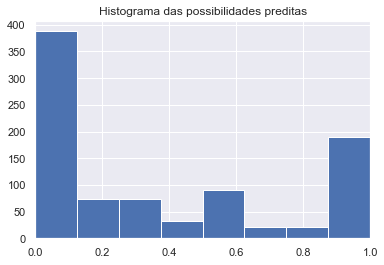

In [344]:
plt.hist(y_hat_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histograma das possibilidades preditas')
plt.show()

# Metrics

In [370]:
#Cross Validate Metric
show_cross_validate(model, df_full[['Pclass', 'Age', 'Sex_Male']], df_full.Survived, k=5)

Accuracy:  0.796959770365634 
Precision:  0.7562365591397849 
Recall:  0.7017476555839728 
F1:  0.726944558497123


In [348]:
ac_random = accuracy_score(y_test, yhat)
ac_random

0.75

In [ ]:
#precision_score(y_test, yhat)

In [ ]:
#recall_score(y_test, yhat)

In [ ]:
#f1_score(y_test, yhat)

# Confusion Matrix - Random Forest

In [ ]:
fig = plt.figure(figsize=(7,5))
cm = confusion_matrix(df_full.Survived, yhat)

kws = {"ha": 'left',"va": 'top', "size":15}
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
heatmap = sns.heatmap(cm/np.sum(cm), annot=labels, annot_kws=kws, fmt='', cmap='Blues').set_title('Confusion Matrix')
plt.tick_params(labelsize=15)
plt.plot()

# ROC CURVE AUC - Random Forest

In [ ]:
show_roc_curve(df_full.Survived, y_hat_prob)

# XGBoost

In [ ]:
model = XGBClassifier()

In [ ]:
df_full.columns

In [ ]:
show_cross_validate(model, df_full[['Pclass', 'Age', 'Sex_Male']], df_full.Survived, k=5)

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

In [ ]:
model.fit(df_full[['Pclass', 'Age', 'Sex_Male']], df_full.Survived)

In [ ]:
df_full[['Pclass', 'Age', 'Sex_Male']]

In [ ]:
yhat = model.predict(df_full[['Pclass', 'Age', 'Sex_Male']])

In [ ]:
y_hat_prob = model.predict_proba(df_full[['Pclass', 'Age', 'Sex_Male']])[:,1]

In [ ]:
plt.title('Histograma das probabilidade de predicao')
plt.xlim(0, 1)
plt.hist(y_hat_prob, bins=10)
plt.show()

In [ ]:
#ROCK CURVE AUC
show_roc_curve(df_full.Survived, y_hat_prob)

In [ ]:
df_full.columns

In [ ]:
yhat = pd.DataFrame(yhat).rename(columns={0:'Predito'})

In [ ]:
yhat = yhat.set_index(df_full[['Pclass', 'Age', 'Sex_Male']].index)

In [ ]:
yhat['True'] = df_full.Survived

In [ ]:
yhat

# Final Result of the Machine Learning Algorithms

In [ ]:
# Columns = [
#     'Algorithm',
#     'Percent of Accuracy'
# ]

# df_metrics = pd.DataFrame({"Algorithm": ['Logistic Regression', 'Tree Decision', 'Random Forest'], 
#                            "Percent of Accuracy": [ac_logistic * 100, ac_tree * 100, ac_random * 100]})
# df_metrics.head()

In [ ]:
# df_metrics.sort_values(['Percent of Accuracy'], ascending=False, inplace=True)

In [ ]:
# f, ax = plt.subplots(figsize=(7,4))

# total = len(df_metrics['Percent of Accuracy'])
# barplot = sns.barplot(x='Percent of Accuracy', y='Algorithm', data=df_metrics, color='darkblue')
# plt.title('Porcentagem de Accuracy por algoritimo')

# plt.show()

# Preparing to Commit at Kaggle

In [172]:
test_csv_path = "df_titanic/test.csv"
df_final = pd.read_csv(test_csv_path)
df_final.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [178]:
df_final[df_final.Age.isnull()].count()

PassengerId    1
Pclass         1
Name           1
Sex            1
Age            0
SibSp          1
Parch          1
Ticket         1
Fare           1
Cabin          0
Embarked       1
dtype: int64

In [182]:
df_final[df_final.Age.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [181]:
df_train[(df_train['Name'].str.contains('Ms.', regex=False) & (df_train['Age'].isnull() == False))].Age.median()

28.0

In [180]:
#Fill NaN values with the Miss' median age
df_final['Age'] = df_final.apply(lambda x : 21 if (('Miss.' in x['Name']) & (pd.isnull(x['Age']) == True)) else x['Age'], axis = 1)

#Fill NaN values with the Master's median age
df_final['Age'] = df_final.apply(lambda x : 3.5 if (('Master' in x['Name']) & (pd.isnull(x['Age']) == True)) else x['Age'], axis=1)

#Fill NaN values with the Mr's median age
df_final.Age = df_final.apply(lambda x: 30 if (('Mr.' in x['Name']) & (pd.isnull(x['Age']) == True ))else x['Age'], axis=1)

#Fill NaN values with the Mrs' median age
df_final.Age = df_final.apply(lambda x: 35 if (('Mrs.' in x['Name']) & (pd.isnull(x['Age']) == True)) else x['Age'], axis=1)

#Fill NaN values with the Dr's Median Age
df_final.Age = df_final.apply(lambda x: 46.5 if (('Dr.' in x['Name']) & (pd.isnull(x['Age']) == True)) else x['Age'], axis=1)

df_final.Age = df_final.apply(lambda x: 28 if (('Ms.' in x['Name']) & (pd.isnull(x['Age']) == True)) else x['Age'], axis=1)

In [183]:
df_final = df_final.drop(columns={'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name'})

In [184]:
df_final['Sex_Male'] = df_final.Sex.map({'female': 0, 'male': 1})

In [185]:
df_final.drop(columns={'Sex'}, inplace=True)

In [186]:
# pd.options.display.max_rows = 60

In [187]:
# df_testando = df_full.append(df_final[['PassengerId', 'Pclass', 'Age', 'Sex_Male']], sort=False)

In [188]:
# df_final = df_testando.reset_index().drop(columns={'index'})

In [189]:
df_final

,PassengerId,Pclass,Age,Sex_Male
0,892,3,34.50,1
1,893,3,47.00,0
2,894,2,62.00,1
3,895,3,27.00,1
4,896,3,22.00,0
5,897,3,14.00,1
6,898,3,30.00,0
7,899,2,26.00,1
8,900,3,18.00,0
9,901,3,21.00,1


In [190]:
yhat = model_rfc.predict(df_final[['Pclass', 'Age', 'Sex_Male']])
yhat

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [191]:
yhat = pd.DataFrame(yhat).rename(columns={0:'Predito'})

In [192]:
yhat = yhat.set_index(df_final[['Pclass', 'Age', 'Sex_Male']].index)

In [193]:
df_final['Predito'] = yhat
df_final

,PassengerId,Pclass,Age,Sex_Male,Predito
0,892,3,34.50,1,0
1,893,3,47.00,0,0
2,894,2,62.00,1,1
3,895,3,27.00,1,1
4,896,3,22.00,0,1
5,897,3,14.00,1,0
6,898,3,30.00,0,0
7,899,2,26.00,1,0
8,900,3,18.00,0,0
9,901,3,21.00,1,0


In [194]:
df_commit = df_final.drop(columns=['Pclass', 'Age', 'Sex_Male'])

In [195]:
df_commit = df_commit.rename(columns={"Predito":'Survived'})

In [200]:
df_commit.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.387560
std,120.810458,0.487777
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [196]:
df_commit.to_csv('gender_submission.csv')